In [83]:
import pandas as pd
import numpy as np
df=pd.read_csv('Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [84]:
#Merge Income
df["Total_Income"]=df["Applicant_Income"]+df["Coapplicant_Income"]
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N,2378.0
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y,2385.0
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y,3620.0
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y,3459.0
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y,6500.0


In [85]:
#Dropping Unnecessary columns
df.drop(["Customer_ID","Gender","Married","Applicant_Income","Coapplicant_Income"],axis=1,inplace=True)
df.head()

,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,Graduate,No,9,360,1,Urban,N,2378.0
1,2,Graduate,No,17,120,1,Urban,Y,2385.0
2,0,Not Graduate,No,25,120,1,Semiurban,Y,3620.0
3,0,Graduate,Yes,25,120,1,Semiurban,Y,3459.0
4,1,Graduate,No,26,360,1,Semiurban,Y,6500.0


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])
df.head()

,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,9,360,1,2,0,2378.0
1,2,0,0,17,120,1,2,1,2385.0
2,0,1,0,25,120,1,1,1,3620.0
3,0,0,1,25,120,1,1,1,3459.0
4,1,0,0,26,360,1,1,1,6500.0


In [87]:
from sklearn.model_selection import train_test_split
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [88]:
#Training Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [89]:
#Evaluation
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
print("\n--- Logistic Regression Report ---")
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred))


--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        40
           1       0.80      0.99      0.88        83

    accuracy                           0.82       123
   macro avg       0.87      0.73      0.76       123
weighted avg       0.85      0.82      0.80       123


Confusion Matrix (Logistic Regression):
[[19 21]
 [ 1 82]]


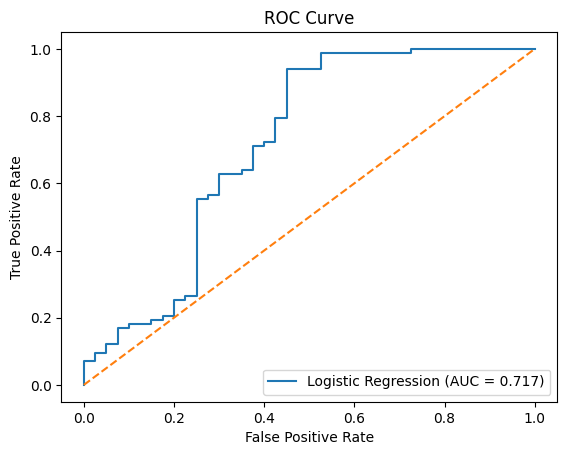

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

# Predict probabilities for ROC
probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [91]:
#Manual Prediction
print("\n--- Manual Prediction Example ---")

user_data = {
    "Dependents": 0,
    "Education": 1,
    "Self_Employed": 1,
    "Loan_Amount": 560,
    "Loan_Amount_Term": 800,
    "Credit_History": 2,
    "Property_Area": 1,
    "Total_Income": 5000
}

user_df = pd.DataFrame([user_data])

prediction = model.predict(user_df)

if prediction[0] == 1:
    print("Loan Approved ✔")
else:
    print("Loan Rejected ✘")


--- Manual Prediction Example ---
Loan Approved ✔
